<a href="https://colab.research.google.com/github/douglas565/Testes-de-tomada-de-decis-oe-consultoria/blob/main/Data_Sciense3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-14-1a36bba4f230>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


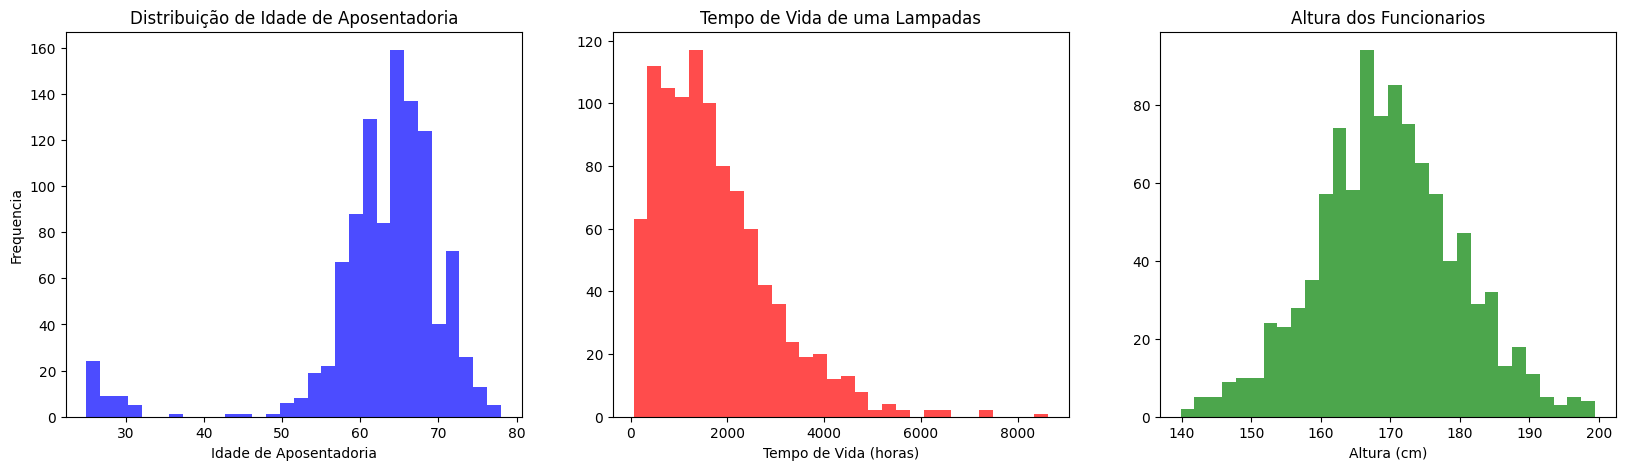

In [14]:
#carre3gando Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#leitura dos dados


#idade de aposentadoria

dados_idade_aposentadoria = pd.read_csv('/content/dados_idade_aposentadoria.csv')

#tempo de Vida de uma lampada

dados_vida_lampada = pd.read_csv('/content/dados_vida_lampada.csv')

#Altura dos Funcionarios

dados_alturas = pd.read_csv('/content/dados_alturas.csv')

#varias distribuições

plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade de Aposentadoria')
plt.ylabel('Frequencia')
plt.hist(dados_idade_aposentadoria, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(dados_vida_lampada, bins=30, alpha=0.7, color='red')
plt.title('Tempo de Vida de uma Lampadas')
plt.xlabel('Tempo de Vida (horas)')

plt.subplot(133)
plt.hist(dados_alturas, bins=30, alpha=0.7, color='g')
plt.title('Altura dos Funcionarios')
plt.xlabel('Altura (cm)')

plt.show()


In [19]:
#Reamostragem

#tamanho da amostra

n = 100

#quantidade de amostras

qnt = 10000

#função de reamostragem e cálculo de média

def reamostragem_media(dados, coluna, n, qnt):

    medias = [dados[coluna].sample(n, replace=True).mean() for _ in range(qnt)]

    return medias

#reamostragem com a função

media_idade = reamostragem_media(dados_idade_aposentadoria, 'idade', n, qnt)
media_duracao = reamostragem_media(dados_vida_lampada, 'duracao', n, qnt)
altura = reamostragem_media(dados_alturas, 'alturas', n, qnt)


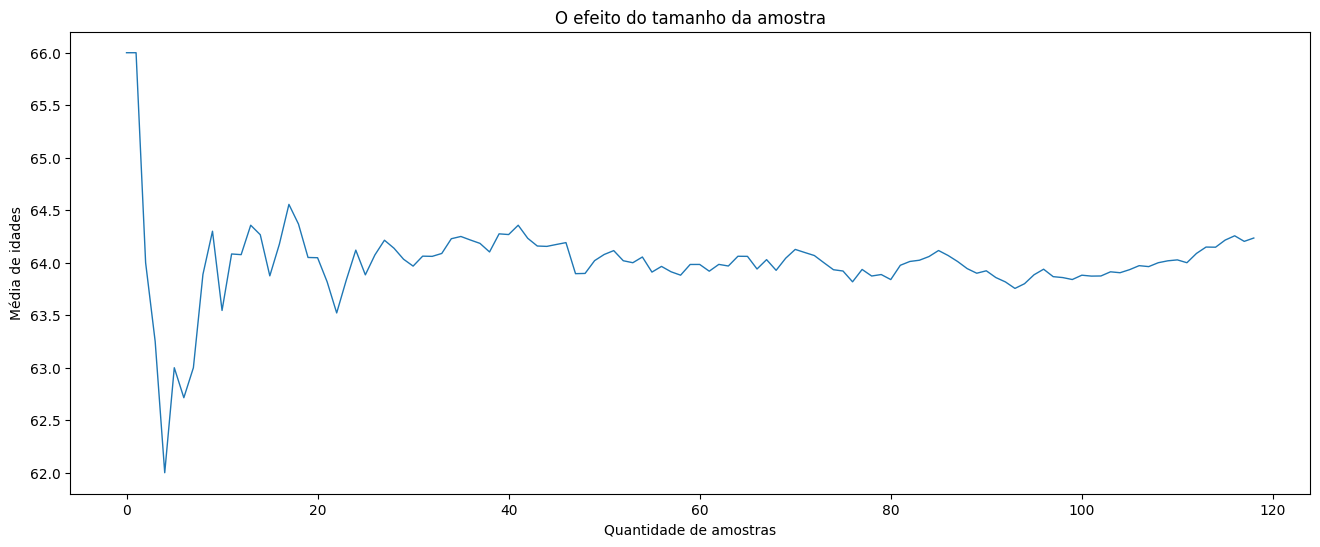

In [18]:

# Coletar a média para cada tamanho de amostra
medias = [dados_idade_aposentadoria[0:i]['idade'].mean() for i in range(1, 120)]

# Plotar a linha
plt.figure(figsize=(16,6))
plt.title('O efeito do tamanho da amostra')
plt.xlabel('Quantidade de amostras')
plt.ylabel('Média de idades')
plt.plot(medias, linewidth=1)


Comparar distribuição original com a distribuição das amostras, comparando a média das distribuições originais e com a distribuição média das médoa amostrais.

In [22]:
print("**** Médias populacionais ****")

print("\n")
print("idade:", dados_idade_aposentadoria['idade'].mean())
print("duracao:", dados_vida_lampada['duracao'].mean())
print("altura:", dados_alturas['alturas'].mean())

**** Médias populacionais ****


idade: 62.70857142857143
duracao: 1731.8036029420002
altura: 169.52022


**** Médias amostrais ****


idade: 62.70413200000019
duracao: 1732.1786628007005
altura: 169.5323827600002


<ipython-input-32-8892d10081e7>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


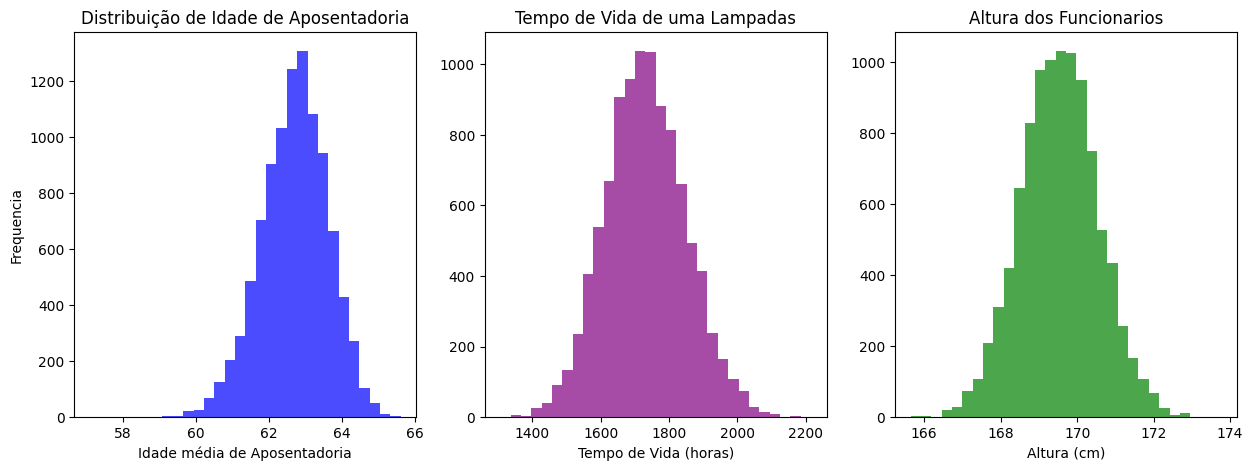

In [32]:
def Average(lst):
    return sum(lst) / len(lst)


print("**** Médias amostrais ****")

print("\n")
print("idade:", Average(media_idade))
print("duracao:", Average(media_duracao))
print("altura:", Average(altura))


plt.subplots(figsize=(15,5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequencia')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Tempo de Vida de uma Lampadas')
plt.xlabel('Tempo de Vida (horas)')

plt.subplot(133)
plt.hist(altura, bins=30, alpha=0.7, color='g')
plt.title('Altura dos Funcionarios')
plt.xlabel('Altura (cm)')

plt.show()

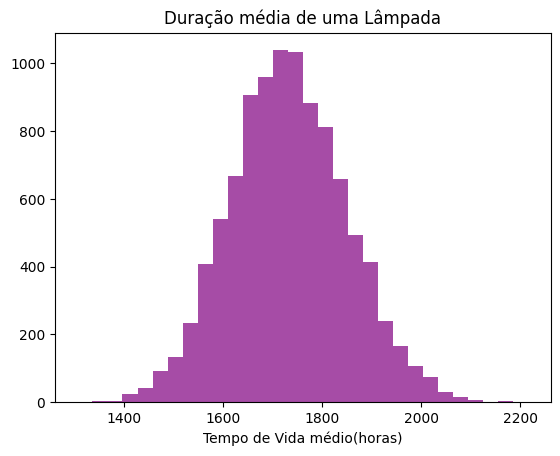

In [39]:
# media da nova amostra

media_nova_amostra = 1200

#media original
dados_vida_lampada['duracao'].mean()

#Quão distante essa média está do comportamento

# Quão distante essa média está do comportamento?

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
  arrowprops=dict(facecolor='green'))


plt.show()



In [45]:
#transformando media_duracao em df

duracao_amostras = pd.DataFrame({'medias_duracao': media_duracao})


In [ ]:
# calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )


In [48]:
#Quantos erros?

1732 - 3*EP

1378.363974292527

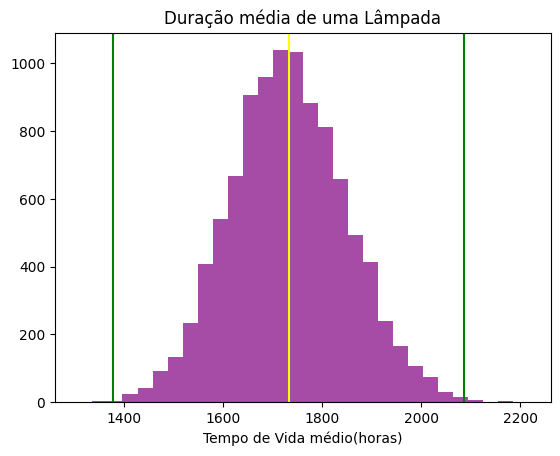

In [51]:
#visualizando a quantidade de amostras entre 3EP +- da média

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.axvline(media_das_medias, color = "yellow" )
plt.axvline(media_das_medias + 3*EP, color = "g" )
plt.axvline(media_das_medias - 3*EP, color = "g" )
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
  arrowprops=dict(facecolor='green'))


plt.show()

In [ ]:
#quanto está disponivel de +ou- dois desvio


qnt_obs = duracao_amostras[(duracao_amostras['medias_duracao'] > media_das_medias - 3*EP) &
                          (duracao_amostras['medias_duracao'] < media_das_medias + 3*EP)]


In [58]:
#quanto isso representa

qnt_obs.count()/duracao_amostras.count()*100

medias_duracao    99.75
dtype: float64